Edge points:
1 4
1 2
Edge points:
1 4
3 5
Edge points:
3 5
4 1
Edge points:
4 1
3 0
Edge points:
1 2
1 4
Edge points:
1 4
3 5
Edge points:
3 5
4 1
Edge points:
4 1
3 0
Edge points:
3 0
1 2
Edge points:
2 0
3 -1
Edge points:
5 1
3 -1
Edge points:
4 -2
5 1
Edge points:
4 -2
2 -4
Edge points:
2 -4
1 -1
Edge points:
2 0
3 -1
Edge points:
3 -1
5 1
Edge points:
5 1
4 -2
Edge points:
4 -2
2 -4
Edge points:
2 -4
1 -1
Edge points:
1 -1
2 0
Edge points:
1 2
1 -1
Edge points:
1 2
2 0
Edge points:
1 2
3 -1
Edge points:
1 4
1 -1
Edge points:
1 4
2 0
Edge points:
1 4
3 -1
Edge points:
3 5
1 -1
Edge points:
3 5
2 0
Edge points:
3 5
5 1
Edge points:
4 1
5 1
Edge points:
4 1
2 0
Edge points:
4 1
3 -1
Edge points:
3 0
5 1
Edge points:
3 0
2 0
Edge points:
3 0
3 -1
Edge points:
2 0
3 0
Edge points:
2 0
4 1
Edge points:
2 0
3 5
Edge points:
2 0
1 4
Edge points:
2 0
1 2
Edge points:
3 -1
4 1
Edge points:
3 -1
3 0
Edge points:
3 -1
3 5
Edge points:
3 -1
1 4
Edge points:
3 -1
1 2
Edge points:
5 1
3 5
Edge po

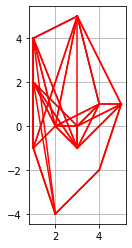

In [20]:
import math
import matplotlib.pyplot as plt

def angle(x, y):
    angle = math.atan2(y, x)
    if angle < 0:
        angle += 2 * math.pi
    return angle

class Node:
    def __init__(self, x, y, node_id=-1):
        self.x = x
        self.y = y
        self.id = node_id
        self.degree = angle(x, y)
        self.dis = 0

    def print(self):
        print(f"{self.x} {self.y}")

    def update(self, p):
        tmp_x = self.x - p.x
        tmp_y = self.y - p.y
        self.dis = math.sqrt(tmp_x**2 + tmp_y**2)
        self.degree = angle(tmp_x, tmp_y)

class Edge:
    def __init__(self, start, end):
        self.start = start
        self.end = end

    def print(self):
        print("Edge points:")
        self.start.print()
        self.end.print()

class Graph:
    def __init__(self):
        self.node_set = []
        self.edge_set = []

    def push_node(self, p):
        self.node_set.append(p)

    def add_node(self, nodes):
        self.node_set.extend(nodes)

    def add_edge(self, edges):
        self.edge_set.extend(edges)

class Polygon:
    
    def get_edge_set(self):
        return self.edge_set
    
    def get_node_set(self):
        return self.node_set

    def add_edge(self, start, end):
        edge = Edge(start, end)
        self.edge_set.append(edge)
        
    def __init__(self):
        self.node_num = 0
        self.node_set = []
        self.edge_set = []
        self.max_node = None
        self.min_node = None

    def push_node(self, p):
        self.node_set.append(p)
        self.node_num += 1
        if self.max_node is None:
            self.max_node = p
        if self.min_node is None:
            self.min_node = p
        if self.max_node.degree - p.degree < 0:
            self.max_node = p
        if self.min_node.degree - p.degree > 0:
            self.min_node = p
        if self.node_num > 1:
            self.add_edge(self.node_set[self.node_num - 2], p)

    def set_edge(self):
        for i in range(len(self.node_set)):
            p1 = self.node_set[i]
            p2 = self.node_set[(i + 1) % len(self.node_set)]
            tmp_edge = Edge(p1, p2)
            self.edge_set.append(tmp_edge)

def get_x(e, p):
    x1 = e.start.x - p.x
    y1 = e.start.y - p.y
    x2 = e.end.x - p.x
    y2 = e.end.y - p.y
    if y1 * y2 < 0:
        return (1.0 * (x1 - x2) / (y1 - y2) * (-y2) + x2)
    elif y1 == 0:
        return x1
    elif y2 == 0:
        return x2
    else:
        return -1

def cmp(a, b):
    if a.degree != b.degree:
        return a.degree < b.degree
    return a.dis < b.dis

def visible_node(e, p, o):
    x_1 = o.x
    y_1 = o.y
    x_2 = e.start.x
    y_2 = e.start.y
    x_3 = e.end.x
    y_3 = e.end.y
    tmp_1 = x_1 * y_2 + x_2 * y_3 + x_3 * y_1 - x_1 * y_3 - x_2 * y_1 - x_3 * y_2
    x_1 = p.x
    y_1 = p.y
    tmp_2 = x_1 * y_2 + x_2 * y_3 + x_3 * y_1 - x_1 * y_3 - x_2 * y_1 - x_3 * y_2
    if tmp_1 * tmp_2 < 0:
        return False
    else:
        return True

def visible_check(p, polygon_set):
    vis_node = []
    all_node = []
    all_edge = []
    node_to_edge = {}
    node_to_polygon = {}
    scan_line = []

    for i, polygon in enumerate(polygon_set):
        tmp = polygon.get_node_set()
        all_node.extend(tmp)
        tmp_edge = polygon.get_edge_set()
        all_edge.extend(tmp_edge)
        for j in range(len(tmp)):
            tmp_node = tmp[j]
            tmp_edge_1 = tmp_edge[j]
            tmp_edge_2 = tmp_edge[(j - 1 + len(tmp)) % len(tmp)]
            node_to_edge[tmp_node] = (tmp_edge_1, tmp_edge_2)
            node_to_polygon[tmp_node] = i

    for i in range(len(all_node)):
        tmp = all_node[i]
        tmp.update(p)

    all_node.sort(key=lambda x: (x.degree, x.dis))

    for i in range(len(all_edge)):
        tmp = all_edge[i]
        node_1 = tmp.start
        node_2 = tmp.end
        x1 = node_1.x - p.x
        y1 = node_1.y - p.y
        x2 = node_2.x - p.x
        y2 = node_2.y - p.y
        if y1 * y2 < 0:
            if (1.0 * (x1 - x2) / (y1 - y2) * (-y2) + x2) >= 0:
                scan_line.append(tmp)

    for i in range(len(all_node)):
        tmp_node = all_node[i]
        index = 0
        if node_to_polygon[p] == node_to_polygon[tmp_node]:
            index = 0
        else:
            if not scan_line:
                vis_node.append(tmp_node)
            else:
                top = scan_line[0]
                if visible_node(top, tmp_node, p):
                    vis_node.append(tmp_node)
                    index = 0
                else:
                    index = 1
                    while index < len(scan_line) and not visible_node(scan_line[index], tmp_node, p):
                        index += 1

        edge_1 = node_to_edge[tmp_node][0]
        edge_2 = node_to_edge[tmp_node][1]

        if edge_1.start.id != tmp_node.id:
            edge_1.start, edge_1.end = edge_1.end, edge_1.start
        if edge_2.start.id != tmp_node.id:
            edge_2.start, edge_2.end = edge_2.end, edge_2.start

        x_1 = p.x
        y_1 = p.y
        x_2 = tmp_node.x
        y_2 = tmp_node.y
        x_3 = edge_1.end.x
        y_3 = edge_1.end.y
        test_edge_1 = x_1 * y_2 + x_2 * y_3 + x_3 * y_1 - x_1 * y_3 - x_2 * y_1 - x_3 * y_2

        x_3 = edge_2.end.x
        y_3 = edge_2.end.y
        test_edge_2 = x_1 * y_2 + x_2 * y_3 + x_3 * y_1 - x_1 * y_3 - x_2 * y_1 - x_3 * y_2

        x_1 = edge_1.end.x
        y_1 = edge_1.end.y
        test_order = x_1 * y_2 + x_2 * y_3 + x_3 * y_1 - x_1 * y_3 - x_2 * y_1 - x_3 * y_2

        if test_edge_1 > 0 and test_edge_2 > 0:
            if test_order > 0:
                scan_line.insert(index, edge_2)
                scan_line.insert(index, edge_1)
            else:
                scan_line.insert(index, edge_1)
                scan_line.insert(index, edge_2)
        else:
            if test_edge_1 < 0:
                for j in range(index, len(scan_line)):
                    if (scan_line[j].start.x == edge_1.start.x and scan_line[j].start.y == edge_1.start.y) or (scan_line[j].end.x == edge_1.start.x and scan_line[j].end.y == edge_1.start.y):
                        del scan_line[j]
                        break
            if test_edge_2 < 0:
                for j in range(index, len(scan_line)):
                    if (scan_line[j].start.x == edge_2.start.x and scan_line[j].start.y == edge_2.start.y) or (scan_line[j].end.x == edge_2.start.x and scan_line[j].end.y == edge_2.start.y):
                        del scan_line[j]
                        break
            if test_edge_1 > 0:
                scan_line.insert(index, edge_1)
            if test_edge_2 > 0:
                scan_line.insert(index, edge_2)

    return vis_node

def visible_map(g, polygon_set):
    node_set = g.node_set
    for i in range(len(node_set)):
        p = node_set[i]
        vis_node = []
        vis_node = visible_check(p, polygon_set)
        for j in range(len(vis_node)):
            tmp_edge = Edge(p, vis_node[j])
            g.add_edge([tmp_edge])

def plot_polygon(polygon):
    x = [node.x for node in polygon.node_set]
    y = [node.y for node in polygon.node_set]
    x.append(x[0])  # Close the polygon by adding the first point again
    y.append(y[0])
    plt.plot(x, y)

def main():
    # Design starting point
    start_node = Node(0, 0)
    polygon_1 = Polygon()
    polygon_1.push_node(Node(1, 2, 1))
    polygon_1.push_node(Node(1, 4, 2))
    polygon_1.push_node(Node(3, 5, 3))
    polygon_1.push_node(Node(4, 1, 4))
    polygon_1.push_node(Node(3, 0, 5))
    polygon_1.set_edge()

    polygon_2 = Polygon()
    polygon_2.push_node(Node(2, 0, 1))
    polygon_2.push_node(Node(3, -1, 2))
    polygon_2.push_node(Node(5, 1, 3))
    polygon_2.push_node(Node(4, -2, 4))
    polygon_2.push_node(Node(2, -4, 5))
    polygon_2.push_node(Node(1, -1, 6))
    polygon_2.set_edge()

    g = Graph()
    g.add_node(polygon_1.node_set)
    g.add_node(polygon_2.node_set)

    g.add_edge(polygon_1.edge_set)
    g.add_edge(polygon_2.edge_set)

    polygon_set = [polygon_1, polygon_2]

    visible_map(g, polygon_set)

    for edge in g.edge_set:
        edge.print()

    # Visualization of the polygons and visible edges
    plt.figure()
    for polygon in polygon_set:
        plot_polygon(polygon)

    for edge in g.edge_set:
        x = [edge.start.x, edge.end.x]
        y = [edge.start.y, edge.end.y]
        plt.plot(x, y, 'r')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid()
    plt.show()
    

if __name__ == "__main__":
    main()


In [16]:
import math
import matplotlib.pyplot as plt

def angle(x, y):
    angle = math.atan2(y, x)
    if angle < 0:
        angle += 2 * math.pi
    return angle

class Node:
    def __init__(self, x, y, node_id=-1):
        self.x = x
        self.y = y
        self.id = node_id
        self.degree = angle(x, y)
        self.dis = 0

    def print(self):
        print(f"{self.x} {self.y}")

    def update(self, p):
        tmp_x = self.x - p.x
        tmp_y = self.y - p.y
        self.dis = math.sqrt(tmp_x**2 + tmp_y**2)
        self.degree = angle(tmp_x, tmp_y)

class Edge:
    def __init__(self, start, end):
        self.start = start
        self.end = end

    def print(self):
        print("Edge points:")
        self.start.print()
        self.end.print()

class Graph:
    def __init__(self):
        self.node_set = []
        self.edge_set = []

    def push_node(self, p):
        self.node_set.append(p)

    def add_node(self, nodes):
        self.node_set.extend(nodes)

    def add_edge(self, edges):
        self.edge_set.extend(edges)

class Polygon:
    def __init__(self):
        self.node_num = 0
        self.node_set = []
        self.edge_set = []
        self.max_node = None
        self.min_node = None

    def push_node(self, p):
        self.node_set.append(p)
        self.node_num += 1
        if self.max_node is None:
            self.max_node = p
        if self.min_node is None:
            self.min_node = p
        if self.max_node.degree - p.degree < 0:
            self.max_node = p
        if self.min_node.degree - p.degree > 0:
            self.min_node = p
        if self.node_num > 1:
            self.add_edge(self.node_set[self.node_num - 2], p)

    def set_edge(self):
        for i in range(len(self.node_set)):
            p1 = self.node_set[i]
            p2 = self.node_set[(i + 1) % len(self.node_set)]
            tmp_edge = Edge(p1, p2)
            self.edge_set.append(tmp_edge)

def get_x(e, p):
    x1 = e.start.x - p.x
    y1 = e.start.y - p.y
    x2 = e.end.x - p.x
    y2 = e.end.y - p.y
    if y1 * y2 < 0:
        return (1.0 * (x1 - x2) / (y1 - y2) * (-y2) + x2)
    elif y1 == 0:
        return x1
    elif y2 == 0:
        return x2
    else:
        return -1

def cmp(a, b):
    if a.degree != b.degree:
        return a.degree < b.degree
    return a.dis < b.dis

def visible_node(e, p, o):
    x_1 = o.x
    y_1 = o.y
    x_2 = e.start.x
    y_2 = e.start.y
    x_3 = e.end.x
    y_3 = e.end.y
    tmp_1 = x_1 * y_2 + x_2 * y_3 + x_3 * y_1 - x_1 * y_3 - x_2 * y_1 - x_3 * y_2
    x_1 = p.x
    y_1 = p.y
    tmp_2 = x_1 * y_2 + x_2 * y_3 + x_3 * y_1 - x_1 * y_3 - x_2 * y_1 - x_3 * y_2
    if tmp_1 * tmp_2 < 0:
        return False
    else:
        return True

def visible_check(p, polygon_set):
    vis_node = []
    all_node = []
    all_edge = []
    node_to_edge = {}
    node_to_polygon = {}
    scan_line = []

    for i in range(len(polygon_set)):
        tmp = polygon_set[i].node_set
        all_node.extend(tmp)
        tmp_edge = polygon_set[i].edge_set
        all_edge.extend(tmp_edge)
        for j in range(len(tmp)):
            tmp_node = tmp[j]
            tmp_edge_1 = tmp_edge[j]
            tmp_edge_2 = tmp_edge[(j - 1 + len(tmp)) % len(tmp)]
            node_to_edge[tmp_node] = (tmp_edge_1, tmp_edge_2)
            node_to_polygon[tmp_node] = i

    for i in range(len(all_node)):
        tmp = all_node[i]
        tmp.update(p)

    all_node.sort(key=lambda x: (x.degree, x.dis))

    for i in range(len(all_edge)):
        tmp = all_edge[i]
        node_1 = tmp.start
        node_2 = tmp.end
        x1 = node_1.x - p.x
        y1 = node_1.y - p.y
        x2 = node_2.x - p.x
        y2 = node_2.y - p.y
        if y1 * y2 < 0:
            if (1.0 * (x1 - x2) / (y1 - y2) * (-y2) + x2) >= 0:
                scan_line.append(tmp)

    for i in range(len(all_node)):
        tmp_node = all_node[i]
        index = 0

        if node_to_polygon[p] == node_to_polygon[tmp_node]:
            index = 0
        else:
            if not scan_line:
                vis_node.append(tmp_node)
            else:
                top = scan_line[0]
                if visible_node(top, tmp_node, p):
                    vis_node.append(tmp_node)
                    index = 0
                else:
                    index = 1
                    while index < len(scan_line) and not visible_node(scan_line[index], tmp_node, p):
                        index += 1

        edge_1 = node_to_edge[tmp_node][0]
        edge_2 = node_to_edge[tmp_node][1]

        if edge_1.start.id != tmp_node.id:
            edge_1.start, edge_1.end = edge_1.end, edge_1.start

        if edge_2.start.id != tmp_node.id:
            edge_2.start, edge_2.end = edge_2.end, edge_2.start

        x_1 = p.x
        y_1 = p.y
        x_2 = tmp_node.x
        y_2 = tmp_node.y
        x_3 = edge_1.end.x
        y_3 = edge_1.end.y
        test_edge_1 = x_1 * y_2 + x_2 * y_3 + x_3 * y_1 - x_1 * y_3 - x_2 * y_1 - x_3 * y_2

        x_3 = edge_2.end.x
        y_3 = edge_2.end.y
        test_edge_2 = x_1 * y_2 + x_2 * y_3 + x_3 * y_1 - x_1 * y_3 - x_2 * y_1 - x_3 * y_2

        x_1 = edge_1.end.x
        y_1 = edge_1.end.y
        test_order = x_1 * y_2 + x_2 * y_3 + x_3 * y_1 - x_1 * y_3 - x_2 * y_1 - x_3 * y_2

        if test_edge_1 > 0 and test_edge_2 > 0:
            if test_order > 0:
                scan_line.insert(index, edge_2)
                scan_line.insert(index, edge_1)
            else:
                scan_line.insert(index, edge_1)
                scan_line.insert(index, edge_2)
        else:
            if test_edge_1 < 0:
                for j in range(index, len(scan_line)):
                    if (scan_line[j].start.x == edge_1.start.x and scan_line[j].start.y == edge_1.start.y) or (scan_line[j].end.x == edge_1.start.x and scan_line[j].end.y == edge_1.start.y):
                        del scan_line[j]
                        break
            if test_edge_2 < 0:
                for j in range(index, len(scan_line)):
                    if (scan_line[j].start.x == edge_2.start.x and scan_line[j].start.y == edge_2.start.y) or (scan_line[j].end.x == edge_2.start.x and scan_line[j].end.y == edge_2.start.y):
                        del scan_line[j]
                        break
            if test_edge_1 > 0:
                scan_line.insert(index, edge_1)
            if test_edge_2 > 0:
                scan_line.insert(index, edge_2)

    return vis_node

def visible_map(g, polygon_set):
    node_set = g.node_set
    for i in range(len(node_set)):
        p = node_set[i]
        vis_node = visible_check(p, polygon_set)
        for j in range(len(vis_node)):
            tmp_edge = Edge(p, vis_node[j])
            g.add_edge(tmp_edge)

def plot_polygon(polygon):
    x = [node.x for node in polygon.node_set]
    y = [node.y for node in polygon.node_set]
    x.append(x[0])
    y.append(y[0])
    plt.plot(x, y)

def main():
    start_node = Node(0, 0)
    polygon_1 = Polygon()
    polygon_1.push_node(Node(1, 2, 1))
    polygon_1.push_node(Node(1, 4, 2))
    polygon_1.push_node(Node(3, 5, 3))
    polygon_1.push_node(Node(4, 1, 4))
    polygon_1.push_node(Node(3, 0, 5))
    polygon_1.set_edge()

    polygon_2 = Polygon()
    polygon_2.push_node(Node(2, 0, 1))
    polygon_2.push_node(Node(3, -1, 2))
    polygon_2.push_node(Node(5, 1, 3))
    polygon_2.push_node(Node(4, -2, 4))
    polygon_2.push_node(Node(2, -4, 5))
    polygon_2.push_node(Node(1, -1, 6))
    polygon_2.set_edge()

    g = Graph()
    g.add_node(polygon_1.node_set)
    g.add_node(polygon_2.node_set)

    g.add_edge(polygon_1.edge_set)
    g.add_edge(polygon_2.edge_set)

    polygon_set = [polygon_1, polygon_2]

    visible_map(g, polygon_set)

    plt.figure()
    for polygon in polygon_set:
        plot_polygon(polygon)

    for edge in g.edge_set:
        x = [edge.start.x, edge.end.x]
        y = [edge.start.y, edge.end.y]
        plt.plot(x, y, 'r')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()



AttributeError: 'Polygon' object has no attribute 'add_edge'